In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from __future__ import division
import scipy.stats as stats
import seaborn as sns

### Monte Carlo
Monte Carlo methods are a collection of techniques that use pseudo-random (computer simulated) values to approximate solutions to mathematical problems.

MCMC is one such case and it uses markov chains to do so.

** Bayesian Inference**
One such case is to estimate expected values by sampling. This is a part of bayesian inference.
$$E_{p(x)}f(x) = \frac{1}{M}\sum_{s=1}^{M}f(x_{s})$$
$$ x_{s} \sim p(x)$$ 

Consider a case of calculating $p(y|x, Y_{train}, X_{train})$

$$p(y|x, Y_{train}, X_{train}) = \int p(y|x,w) p(w|Y_{train},X_{train}) dw $$
$$ = E_{p(w|Y_{train},X_{train})}p(y|x,w)$$ i.e expected value of y given x and w, with some distribution over w
$$p(w|Y_{train},X_{train}) = \frac{p(Y_{train}|X_{train},w)p(w)}{Z}$$, Z being integral over $dx_{train}, dy_{train}$

Z is very complex, as we never truly know the distributio among X,Y we only approximate it using function approximators like neural nets.

The above example is a general representaion of any machine learning model.

**M-Step of EM Algorithm**
We approximate the posterior over q(by sampling) and then compute the integral analytically over simplified posterior
$$ max_{\theta}E_{p(q)}p(X,T|\theta)$$

#### Sampling - 1D
**Pseudo-random number generators in machines**
Random numbers from other distributions are in turn generated using these uniform random deviates, either via general (inverse transform, accept/reject, mixture repreentations) or specialized ad-hoc (e.g. Box-Muller) methods.

** Discrete **<br>
A frequency plot/ bar graph of discrete variables show the probability distribution of the discrete random variables.
We approximate the discrete distribution by dividing the uniform sampler between 0 to 1.
<img src = ./res/08_sampling_discrete_1d.png>

probability of a number occuring $\propto$ length of interval<br>
Problem is severe when there a lot of chunks (> 1000)

** Continous **
We do rejection sampling here which basically has the idea is enclose the distribution we want inside a distribution which is always greater than the enclosed distribution for a given value.
then **area under curve = area under enclosing distr ($\frac{points\space under \space curve}{points\space under \space enclosing\space distr}$)**

We use area under the curve as it is the $\int$ over pdf = cdf

Resource:-
- https://towardsdatascience.com/monte-carlo-analysis-and-simulation-fd26f7cca448 , read this and let me know if science still doesn't inspire you

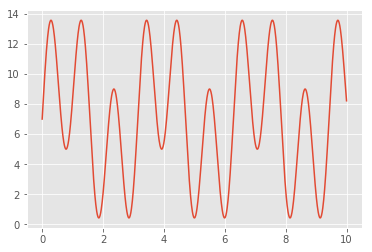

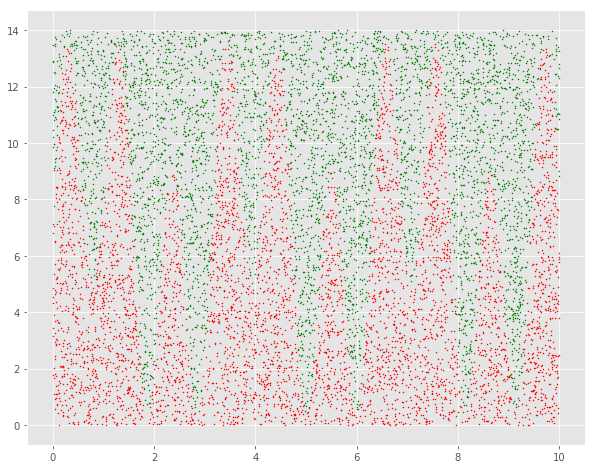

In [40]:
#Continous sampling 
import math
import random
f = lambda x: 5 * math.sin(6 * x) + 3 * math.sin(2 * x) + 7
x = np.linspace(0, 10, 1000)
y = [f(val) for val in x]

_ = plt.plot(x,y)

NUM_POINTS = 10000

rect_width = 10
rect_height = 14

rand_x = lambda: random.uniform(0, rect_width)
rand_y = lambda: random.uniform(0, rect_height)

points = [(rand_x(), rand_y()) for i in range(NUM_POINTS)]
points_under = [point for point in points if point[1] <= f(point[0])]
points_above = list(set(points) - set(points_under))

# # Separate x's and y's to pass to scatter function.
(under_x, under_y) = zip(*points_under)
(over_x, over_y) = zip(*points_above)

fig = plt.figure()
fig.set_size_inches(10, 8)
_ = plt.scatter(under_x, under_y, s=1, color='red')
_ = plt.scatter(over_x, over_y, s=1, color='green')

### Markov Chain

A Markov chain is a sequential model that transitions from one state to another in a probabilistic fashion, where the next state that the chain takes is conditioned on the previous state. 

Markov chains when constructed appropriately and allowed to run for a long time then the states that a chain will take also sample from a target probability distribution. 

Therefore we can construct Markov chains to sample from the distribution whose integral we would like to approximate, then use Monte Carlo integration to perform the approximation.

Let us do a deep dive
Probability of a state is nothing but amount of times the state occured out of all possible outcomes(only the states in the state set can be the outcome). 
Eg:- Weather follows an inherent markov property (maybe of higher order, but it does)
Sunny, Cloudy and Rainy are the three possible states in the weather set. Now let us assume their probability or likelihood being:-
- P(S) = 0.3
- P(C) = 0.4
- P(R) = 0.3

But don't we want to see the effect when they occur one after the other ?,  This distribution is captured by a markov table (just a fancy name, pss:- lets honor the creator)
For each state notice the probabilit of occurence for the next state sums to one( this is a complete set of achievable states).
https://docs.google.com/spreadsheets/d/1-SVWTc0JabkC5COFtkKjSAflLHG4Mf2v399rFrqGBIE/edit?usp=sharing

Markov Chains can be represented as a state diagram(for computer folks these are FSM), or a matrix called a Transition Matrix.

<img src = './res/09_markov_chain_example.png' />

A current state vector tells us about the current state (1,0,0) say it is sunny in the current state
In the excel you will see that how dependency on previous state gives us more info about the next likely state.
Just on the previous stae :- 1st order
Just on last two states :- 2nd order 
and story goes on and on and on (like Celine Dion)


In [19]:
#let's use some python codes to analyze discrete and continous markov chain
transition_matrix = np.array([[0.5,0.3,0.2],[0.1,0.5,0.4],[0.05,0.35,0.6]])
state_vector = np.array([[1,0,0]])
#Number of samples to draw, or say number of weather transition to observe :P
n_iter = 50
for i in range(1,n_iter):
    state_vector = np.vstack((state_vector, np.dot(state_vector[i-1,:], transition_matrix)))

In [21]:
state_vector[1:10,:] #See a sample

array([[ 0.5   ,  0.3   ,  0.2   ],
       [ 0.29  ,  0.37  ,  0.34  ],
       [ 0.199 ,  0.391 ,  0.41  ],
       [ 0.1591,  0.3987,  0.4422],
       [ 0.1415,  0.4019,  0.4566],
       [ 0.1338,  0.4032,  0.463 ],
       [ 0.1304,  0.4038,  0.4658],
       [ 0.1289,  0.4041,  0.4671],
       [ 0.1282,  0.4042,  0.4676]])

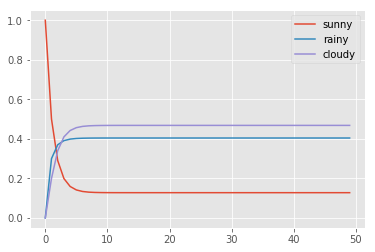

In [22]:
#Plotting the values
plt.plot(range(n_iter), state_vector[:,0], label = "sunny")
plt.plot(range(n_iter), state_vector[:,1], label = "rainy")
plt.plot(range(n_iter), state_vector[:,2], label = 'cloudy')
plt.legend(loc='upper right')
plt.show()


So now the question becomes how do these two integrate or come together, while monte carlo exploits sampling to approximate integeration, markov chains are used to sample p(x)
$$E_{p(x)}f(x) = \frac{1}{M}\sum_{s=1}^{M}f(x_{s})$$
$$ x_{s} \sim p(x)$$ 

When it’s possible to draw independent samples, the sum above is well understood. It’s easy to estimate the error after k samples(burn in), or to turn it the other way around, estimate what size k you need so that the error is probably below a desired threshold.

So
- We want to sample from p(x)
- Build a markov chain which converges to p(x)
- Start from any $x^{0}$
- For k=0,1..
$$x^{k+1} \sim T(x^{k} -> x^{K+1})$$
- Eventually $x^{k}$ will look like samples from p(x)

Stationarity :- <br>
A distribution $\pi$ is called stationary if 
$$ \pi(x^{'}) = \sum_{x} T(x->x^{'})\pi(x)$$

and if $T(x->x^{'}) > 0 $, then a unique and stationary $\pi(x)$ exists.

#### Summary
So, 
Scenario :- We are interested in generating a random variable X with a distribution of $\pi$.
If we are not able to do this directly, we will be satisfied with generating a sequence of random variables $X_0, X_1,..$which tends to a distribution $\pi $. MCMC does this for us , with monte carlo estimation and distribution from which sampling happens build by markov chains. 

Build a Markov chain X_0, X_1, ... for X, whose stationary distribution is $\pi$. If the structure is correct, we should expect random variables to converge to $\pi$.



### Gibbs Sampler
Gibbs Sampler help us construct markov chains whose states generate random variable with a distribution $\pi$, where $\pi$ is stationary.
This image below describes gibbs sampling.
<img src = "./res/10_gibbs_sampling.png"/>
Pros :- 
- Reduces multi-d sampling to sequence of 1-d samplings
- Easy to implement

Cons :- 
- Highly correlated samples, (looks at changes in one dimension at a time), need to run a large sample say out of 1k samples only 100 are of use.
- Slow convergence (mixing). Gibbs sampler sequentially samples the value of each variable separately, in a component-wise fashion.Slow mixing is due to a number of factors including the “random walk” nature of the Markov chain, as well as the tendency of the Markov chain to get “stuck,” only sampling a single region of x having high-probability under p(x). Such behaviors are bad for sampling distributions with multiple modes or heavy tails. More advanced techniques, such as Hybrid Monte Carlo have been developed to incorporate additional dynamics that increase the efficiency of the Markov chain path. [clever machine]

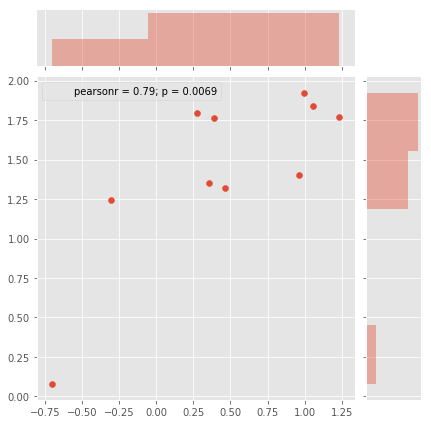

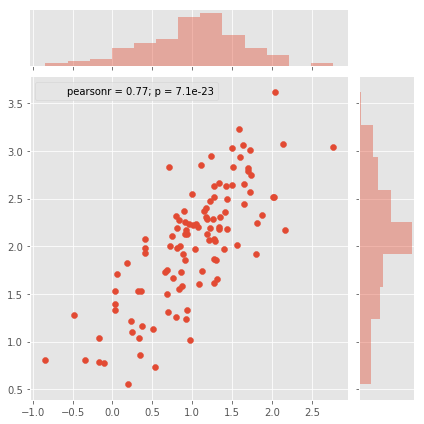

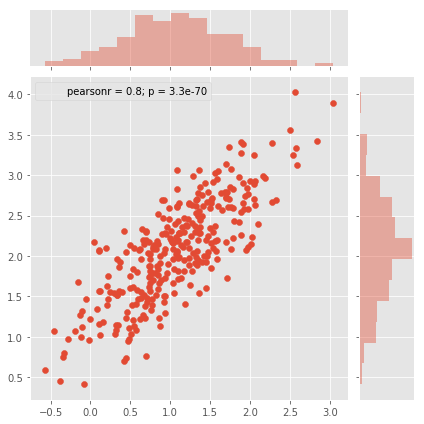

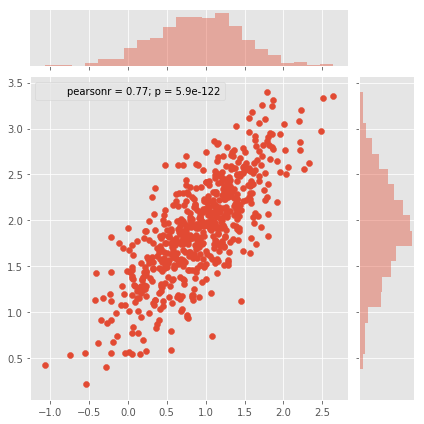

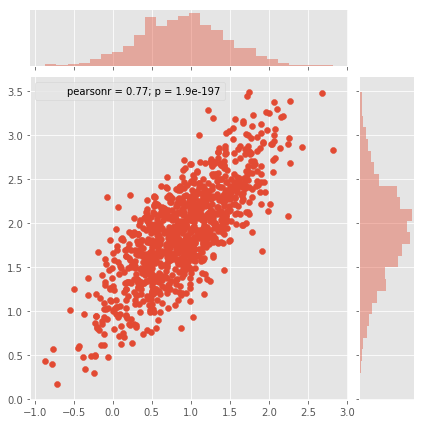

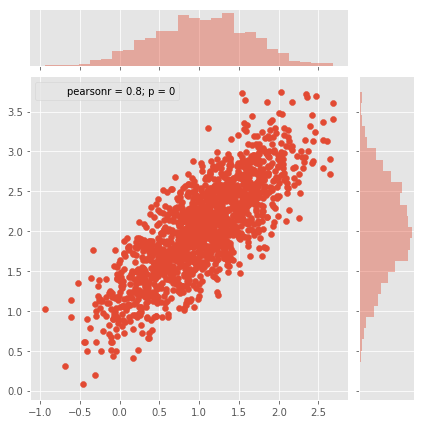

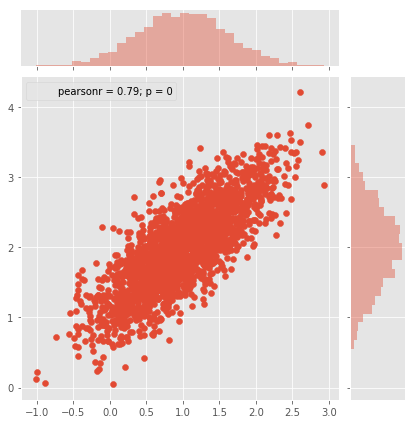

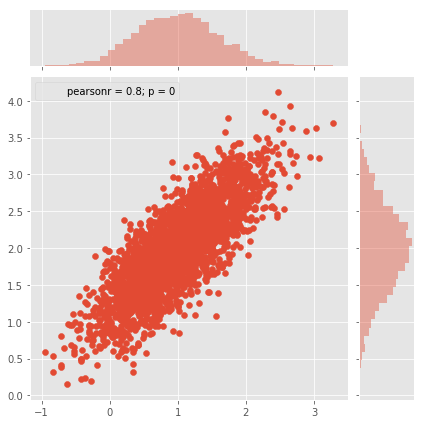

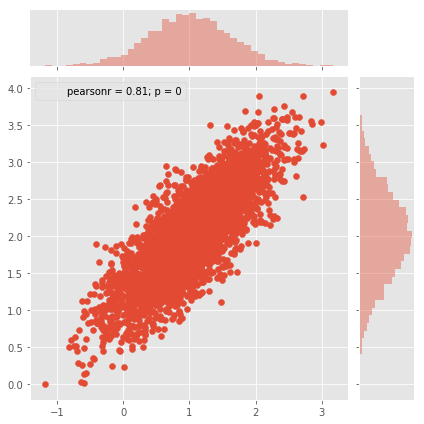

In [52]:
#python implementation of gibbs sampler
#Sampling from a bivariate normal distribution
#p(x) = N(mu, sigma), mu = [1,2] and sigma = [[1,rho],[rho,1]]
#In order to sample from this distribution using a Gibbs sampler, we need to have in hand 
#the conditional distributions for variables/dimensions 

#More details here https://theclevermachine.wordpress.com/2012/11/05/mcmc-the-gibbs-sampler/

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mus, sigmas, iteration):
    #Generate as many points as samples to be generated
    samples = np.zeros((iteration, 2))
    y = np.random.rand() * 2 # keep why between 0 to 2 , initialize just one of the value

    for i in range(iteration):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples

mus = np.array([1, 2])
sigmas = np.array([[1, .8], [.8, 1]])

iteration = 10
for i in range(1, 10):
    samples = gibbs_sampling(mus, sigmas, iteration)
    iteration += 100*i
    plt.figure()
    sns.jointplot(samples[:, 0], samples[:, 1]) 


#Shows how conditionals are both univariate Normal distributions, 
#each with a mean that is dependent on the value of the most recent state of the conditioning variable, 
#and a variance that is dependent on the target covariances between the two variables.



### Metropolis - Hasting
For markov chain to sample from a target distribution it's transition operation should be designed such that it makes the chain’s stationary distribution match the target distribution.
The metroplis hasting is an algo which does exactly that.

**Metropolis Sampling**<br>
Starting from some random initial state $x^{(0)} \sim \pi^{(0)}$, draw a sample $x^*$ from a  proposal distribution $q(x | x^{(t-1)})$ [Proposal distribution is stationary and depends only on previous state.]

Transition operator assesses whether or not the target distribution($\pi$) has a sufficiently large density near the proposed state($x^*$) to accept proposed state as a sample and set it to the next state in the chain. 

If the density of p(x) is low near the proposed state, then it is likely (but not guaranteed) that it will be rejected. The criterion for accepting or rejecting a proposed state are defined by the following heuristics, the idea is to ideally move the chain’s state to a location  where p(x) has equal or greater density :

- If $p(x^*) \geq p(x^{(t-1)})$,  the proposed state is kept $x^*$ and made the next state in the chain.
- If $p(x^*) < p(x^{(t-1)})$–indicating that p(x) has low density near $x^*$ –then the proposed state may still be accepted, but only randomly, and with a probability $\frac{p(x^*)}{p(x^{(t-1)})}$

The acceptance probability then becomes  $\alpha = \min \left(1, \frac{p(x^*)}{p(x^{(t-1)})}\right)$

To generate M samples by metropolis, generate M random uniform values and check it with $\alpha$ if u $\leq \alpha$ then assign proposed state to be the new state otherwise keep the old or previous state as the new state.

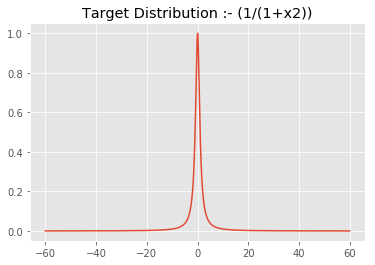

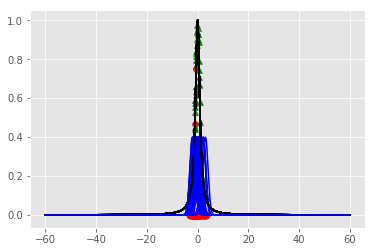

In [136]:
from scipy import stats
#METROPOLIS SAMPLING EXAMPLE
np.random.seed(42)
 
#Target distribution
pi = lambda x: (1 + x**2)**(-1)

num_samples = 5000
burn_in = 500 #burn in for markov chain to stabilize
num_sample_display = 50 # number of samples used for display purposes
sigma = 1 #distribution standard deviation
minn = -20 #Target distribution domain value min
maxx = 20 #Target distribution domain value min
x_target = np.arange(3*minn,3*maxx,0.1)
target = pi(x_target)
plt.plot(x_target,target)
plt.title("Target Distribution :- (1/(1+x2))")

#Initialize Metropolis sampler
x = np.zeros(num_samples)
x[0] = np.random.normal(0,1)

fig, ax = plt.subplots()

for t in range(1,num_samples):
    #Sample from proposal distribution
    xStar = np.random.normal(x[t-1] ,sigma)
    proposal = stats.norm(x[t-1], sigma).pdf(x_target)
 
    #Calc acceptance prob
    alpha = min([1, pi(xStar)/pi(x[t-1])])
 
    #Accept OR Reject?
    u = np.random.uniform()
    if u < alpha:
        x[t] = xStar
        str = 'Accepted'
    else:
        x[t] = x[t-1]
        str = 'Rejected'
    
    #Sampling Dynamics
    if t < num_sample_display + 1:
        ax.plot(x_target,target,color='black')
        ax.plot(x_target,proposal,color='blue')
        #ax.plot([x[t-1],x[t-1]],[0, pi(x[t-1])], color='black', linewidth = 1)
        plt.scatter(xStar,0,marker='o' ,linewidth = 2, color= 'Red')
        #ax.plot([xStar,xStar],[0, pi(xStar)], color='black', linewidth = 1)
 
        if str == 'Rejected':
            plt.scatter(xStar,pi(xStar),marker='o', color = 'Red')
        elif str == 'Accepted':
            plt.scatter(xStar,pi(xStar),marker='^', color= 'Green')



**Reversibility of the transition operator**
It turns out that there is a theoretical constraint, probability of the transition $x^{(t)} \to x^{(t+1)}$ must be equal to the probability of the reverse transition $x^{(t+1)} \to x^{(t)}$. This reversibility property is often referred to as detailed balance. Using the Metropolis algorithm transition operator, reversibility is assured if the proposal distribution $q(x|x^{(t-1)})$ is symmetric. Such symmetric proposal distributions are the Normal, Cauchy, Student’s-t, and Uniform distributions.

However, using a symmetric proposal distribution may not be reasonable to adequately or efficiently sample all possible target distributions. For instance if a target distribution is bounded on the positive numbers $0 < x \leq \infty$. 

This is where the Metropolis-Hastings sampling algorithm comes in.<br>
In order to be able to use an asymmetric proposal distributions, the Metropolis-Hastings algorithm implements an additional correction factor c, defined from the proposal distribution as

$$c = \frac{q(x^{(t-1)} | x^*) }{q(x^* | x^{(t-1)})}$$

The correction factor adjusts the transition operator to ensure that the probability of moving from $x^{(t-1)} \rightarrow x^{(t)}$ is equal to the probability of moving from $x^{(t-1)} \rightarrow x^{(t)}$, no matter the proposal distribution.


The acceptance probability then becomes  $\alpha = \min \left(1, \frac{p(x^*)*c}{p(x^{(t-1)})}\right)$

